# OLS ESTIMATORS UNBIASED

%%latex
\textbf{Unbiasedness of OLS Estimates under Gauss-Markov Assumption:} 

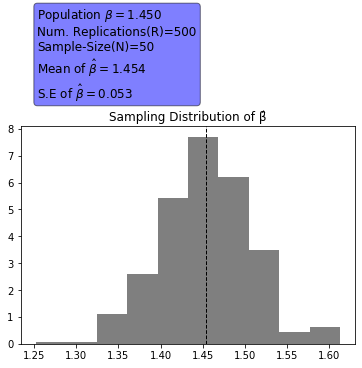

In [1]:
'''## OLS ESTIMATORS (using numpy array)'''

import numpy as np
import matplotlib.pyplot as plt
import statistics as stat # inbuilt function necessary to get mean of a list
%matplotlib inline
#Define Function '''Sampling Distribution that recreates a sampling distribution'''

def sampling_betahat(alpha,beta,rep,ss):
        np.random.seed(2000)
        α = alpha # Population Reg Func Intercept Parameter
        β = beta # Population Reg Func Slope Parameter
        R = rep # Number of Replications of the sampling
        N = ss # Size of Sample
        betahat_array = np.empty(R)
        #print('betahat_array',type(betahat_array),betahat_array.shape)

        for i in range(R):

                # Sample
                X = np.array([4*np.random.randn(N)]) # necessary to create 2-D array in Python so as to transpose it
                #print('X', type(X), X.shape, X)
                ε = np.array([np.random.randn(N)])
                #print('ε', type(ε), ε.shape, ε)
                Y = α*np.array([np.ones((N), dtype=int)]) + np.dot(β,X) + ε
                #Y = α*np.transpose(np.ones((N,), dtype=int)) + β*X + ε
                #print('Y', type(Y), Y.shape, Y)
                #plt.scatter(X,Y)
                Z = np.dot(np.linalg.inv(np.dot(X,np.transpose(X))),np.dot(X,np.transpose(Y)))
                #Z = (np.linalg.inv(np.mat(X)*np.transpose(X)))*np.mat(X)*np.transpose(Y)
                #print('Z',type(Z), Z.shape, Z)
                betahat = np.array(Z)[0]
                #print('Loop Num:', i, 'betahat', type(betahat), betahat.shape, betahat)
                betahat_array[i] = betahat # Populate consecutive beta estimates into a pre-defined numpy array
                #betahat_array[i,:] =np.append(betahat,betahat,axis=0) 
        return betahat_array,R,ss,α,β

betahat_array,R,ss,α,β = sampling_betahat(1,1.45,500,50) # Function call & Assignment: Sampling Means Array 

#print('betahat_array', type(betahat_array), betahat_array.shape, betahat_array)
plt.hist(betahat_array,bins=10,color='black',alpha=0.5, density=1)
betahat_mean = np.mean(betahat_array) # Mean of Sample Means
betahat_std = np.std(betahat_array) # Analytical Standard error of Sampling Distribution
plt.axvline(betahat_mean,color='k',linestyle='dashed',linewidth=1)
boxtext = '\n'.join((
    r'Population $\beta=%3.3f$' % (β, ),
    r'Num. Replications(R)=%i' % (R, ),
    r'Sample-Size(N)=%i' % (ss, ),
    r'Mean of $\hat{\beta}=%3.3f$' % (betahat_mean, ),
    r'S.E of $\hat{\beta}=%.3f$' % (betahat_std, ) 
    ))
min_xlim, max_xlim = plt.xlim()
min_ylim, max_ylim = plt.ylim()
props = dict(boxstyle='round', facecolor='blue', alpha=0.5)
plt.text(min_xlim+0.02,max_ylim*1.55, boxtext, fontsize=12,verticalalignment='top',bbox=props)
plt.title('Sampling Distribution of β̂')
plt.show()